# Interleaved Randomized Benchmarking (IRB)

In [1]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

Set IQM Token if using Resonance.

In [3]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Interleaved Randomized Benchmarking Configuration
### 1Q gate IRB

In [4]:
from iqm.benchmarks.randomized_benchmarking.interleaved_rb.interleaved_rb import *
import numpy as np

In [5]:
EXAMPLE_IRB_1Q = InterleavedRBConfiguration(
    qubits_array=[[0],[2]],#,[4],[6]],[8],[10],[12],[14],[16],[17],[19]],
    sequence_lengths=[2**(m+1)-1 for m in range(8)],
    num_circuit_samples=25,
    shots=2**9,
    calset_id=None,
    parallel_execution=True,
    interleaved_gate = "RGate",
    interleaved_gate_params = [np.pi, 0],
    simultaneous_fit = ["amplitude", "offset"],
)

#### Run the experiment - 1Q gate IRB

In [6]:
benchmark_irb_1Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_1Q)
run_irb_1Q = benchmark_irb_1Q.run()

2025-01-09 17:20:51,553 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-01-09 17:20:52,324 - iqm.benchmarks.logging_config - INFO - Now executing parallel Interleaved RB on qubits [[0], [2]]. Will generate and submit all 25 Interleaved and Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127, 255].
2025-01-09 17:20:52,324 - iqm.benchmarks.logging_config - INFO - Generating Clifford RB circuits of sequence length 1
2025-01-09 17:20:52,387 - iqm.benchmarks.logging_config - INFO - Generating Interleaved RB circuits of sequence length 1
2025-01-09 17:20:52,432 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0, 2]
2025-01-09 17:20:52,440 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0, 2]
2025-01-09 17:20:52,652 - iqm.benchmarks.logging_config - INFO - Both jobs for sequence length 1 submitted successfully!
2025-01-09 17:20:52,671 - i

#### Analyze the results - 1Q gate IRB

In [7]:
result_irb_1Q = benchmark_irb_1Q.analyze()

2025-01-09 17:21:49,877 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Interleaved RB for qubits [[0], [2]]
2025-01-09 17:21:49,939 - iqm.benchmarks.logging_config - INFO - Metrics for Clifford estimated successfully!
2025-01-09 17:21:50,000 - iqm.benchmarks.logging_config - INFO - Metrics for Interleaved estimated successfully!


{'interleaved': {'[0]': 0.9975073376613797}, 'clifford': {'[0]': 0.9957157328789242}}
[0]
clifford
{'interleaved': {'[2]': 0.9976959612386156}, 'clifford': {'[2]': 0.9957310522299055}}
[2]
clifford


In [8]:
result_irb_1Q.observations

[BenchmarkObservation(name='avg_gate_fidelity_interleaved', value=0.9975073376613797, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=9.752861001879659e-05),
 BenchmarkObservation(name='avg_gate_fidelity_clifford', value=0.9957157328789242, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=8.028839025109517e-05),
 BenchmarkObservation(name='avg_gate_fidelity_interleaved', value=0.9976959612386156, identifier=BenchmarkObservationIdentifier(qubit_indices=[2]), uncertainty=9.64196778583225e-05),
 BenchmarkObservation(name='avg_gate_fidelity_clifford', value=0.9957310522299055, identifier=BenchmarkObservationIdentifier(qubit_indices=[2]), uncertainty=8.243656712565855e-05)]

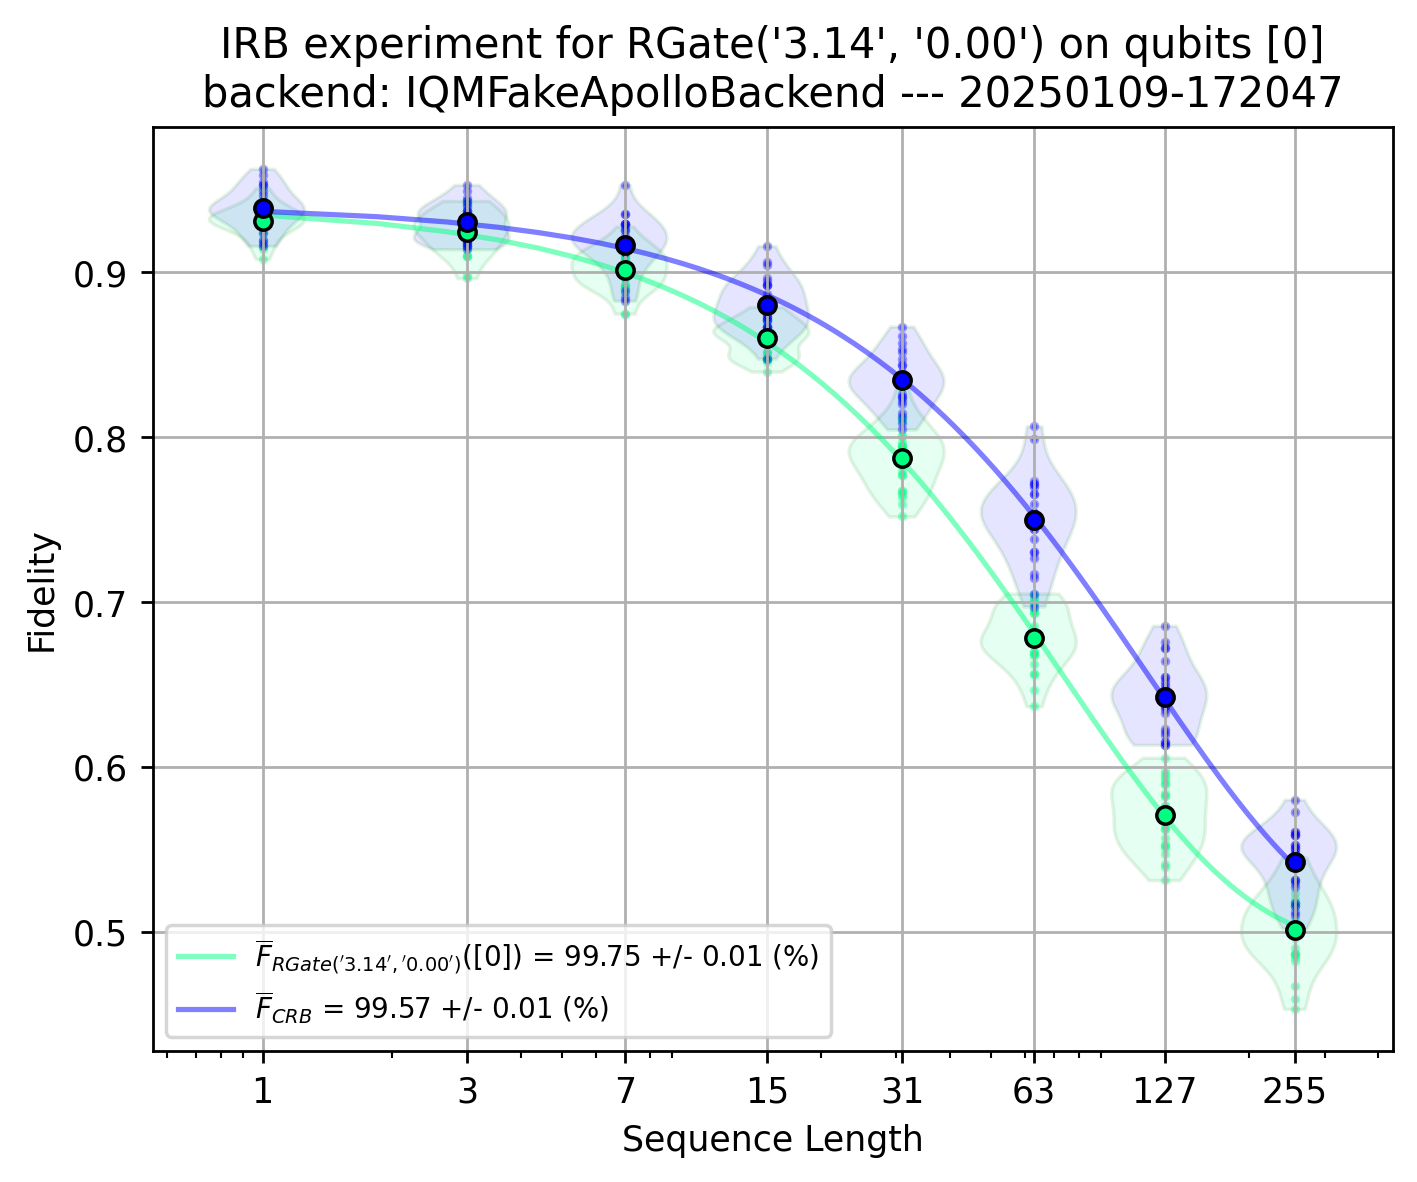

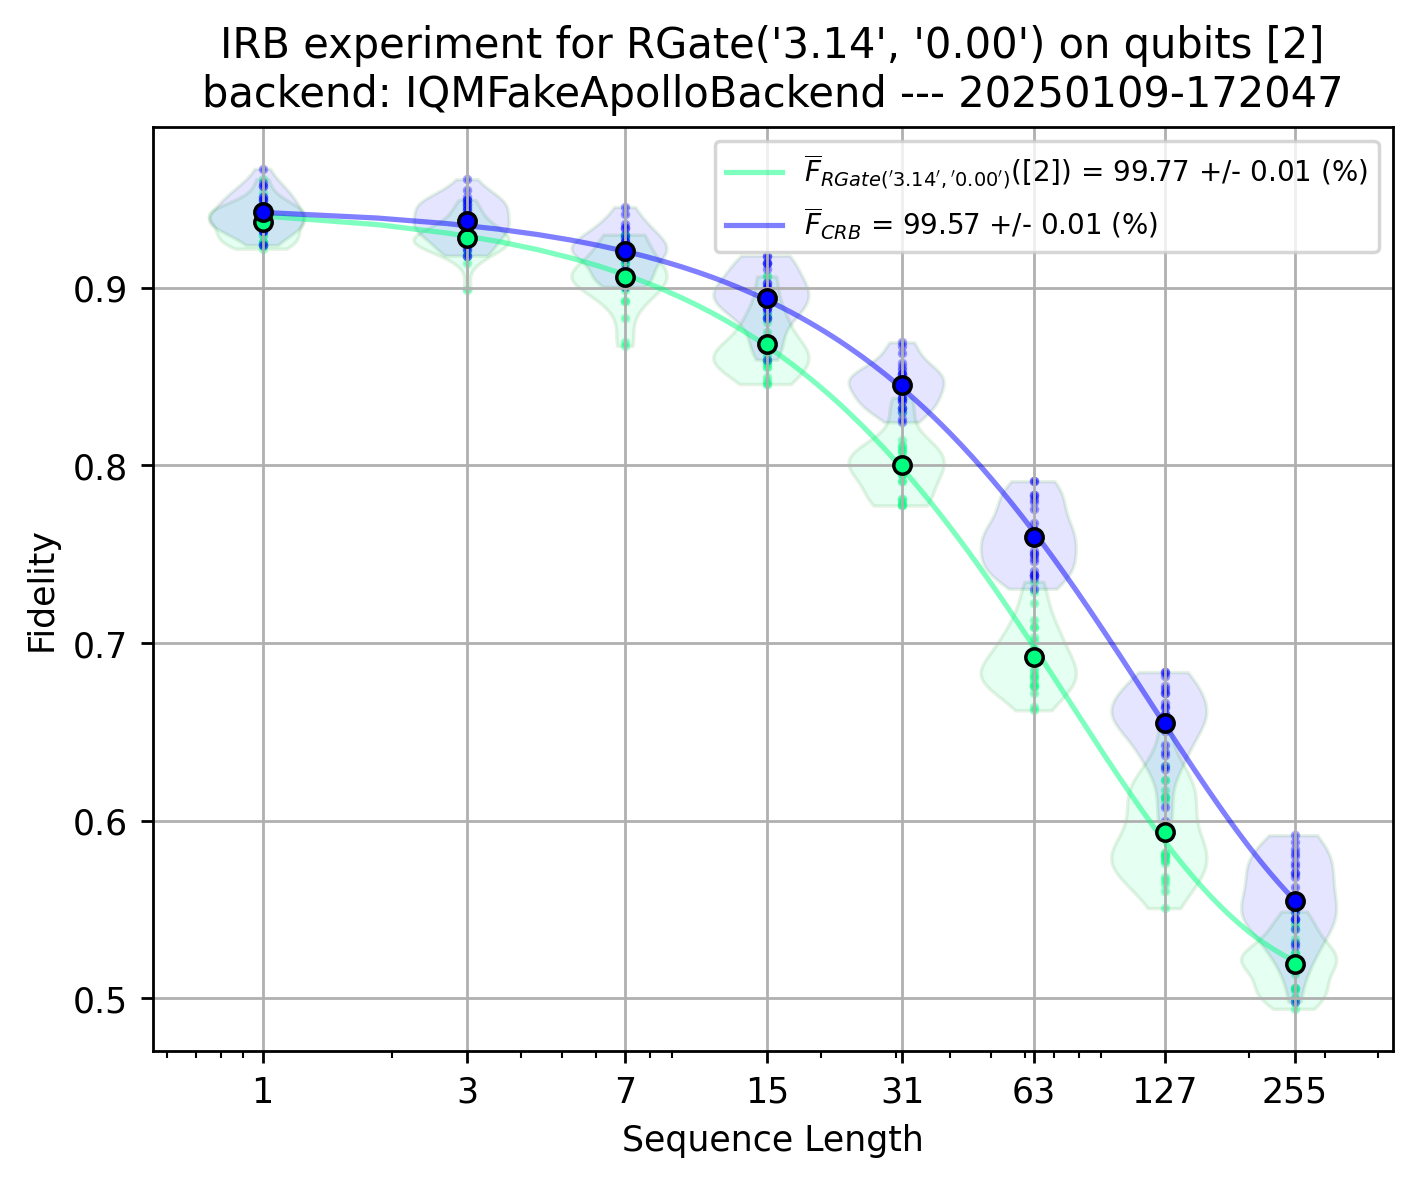

In [9]:
for v in result_irb_1Q.plots.values():
    display(v)

### 2Q gate IRB

In [10]:
EXAMPLE_IRB_2Q = InterleavedRBConfiguration(
    qubits_array=[[0,1],[3,4]],#,[8,9],[13,14],[17,18],[5,6],[10,11],[15,16]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None, # calibration set ID, default is None
    parallel_execution=True, # whether RB is run in parallel - use if you know what you're doing!
    interleaved_gate = "CZGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

#### Run the experiment - 2Q gate IRB

In [11]:
benchmark_irb_2Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_2Q)
run_irb_2Q = benchmark_irb_2Q.run()

2025-01-09 17:22:07,679 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-01-09 17:22:07,682 - iqm.benchmarks.logging_config - INFO - Now executing parallel Interleaved RB on qubits [[0, 1], [3, 4]]. Will generate and submit all 25 Interleaved and Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127].
2025-01-09 17:22:07,682 - iqm.benchmarks.logging_config - INFO - Generating Clifford RB circuits of sequence length 1
2025-01-09 17:22:07,831 - iqm.benchmarks.logging_config - INFO - Generating Interleaved RB circuits of sequence length 1
2025-01-09 17:22:07,968 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0, 1, 3, 4]
2025-01-09 17:22:07,968 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0, 1, 3, 4]
2025-01-09 17:22:08,049 - iqm.benchmarks.logging_config - INFO - Both jobs for sequence length 1 submitted successfully!
2025-01-09 17:

#### Analyze the results - 2Q gate IRB

In [12]:
result_irb_2Q = benchmark_irb_2Q.analyze()

2025-01-09 17:23:45,635 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Interleaved RB for qubits [[0, 1], [3, 4]]
2025-01-09 17:23:45,685 - iqm.benchmarks.logging_config - INFO - Metrics for Clifford estimated successfully!
2025-01-09 17:23:45,734 - iqm.benchmarks.logging_config - INFO - Metrics for Interleaved estimated successfully!


{'interleaved': {'[0, 1]': 0.9798030906041997}, 'clifford': {'[0, 1]': 0.9431232937255942}}
[0, 1]
clifford
{'interleaved': {'[3, 4]': 0.9840858225184934}, 'clifford': {'[3, 4]': 0.945382422883015}}
[3, 4]
clifford


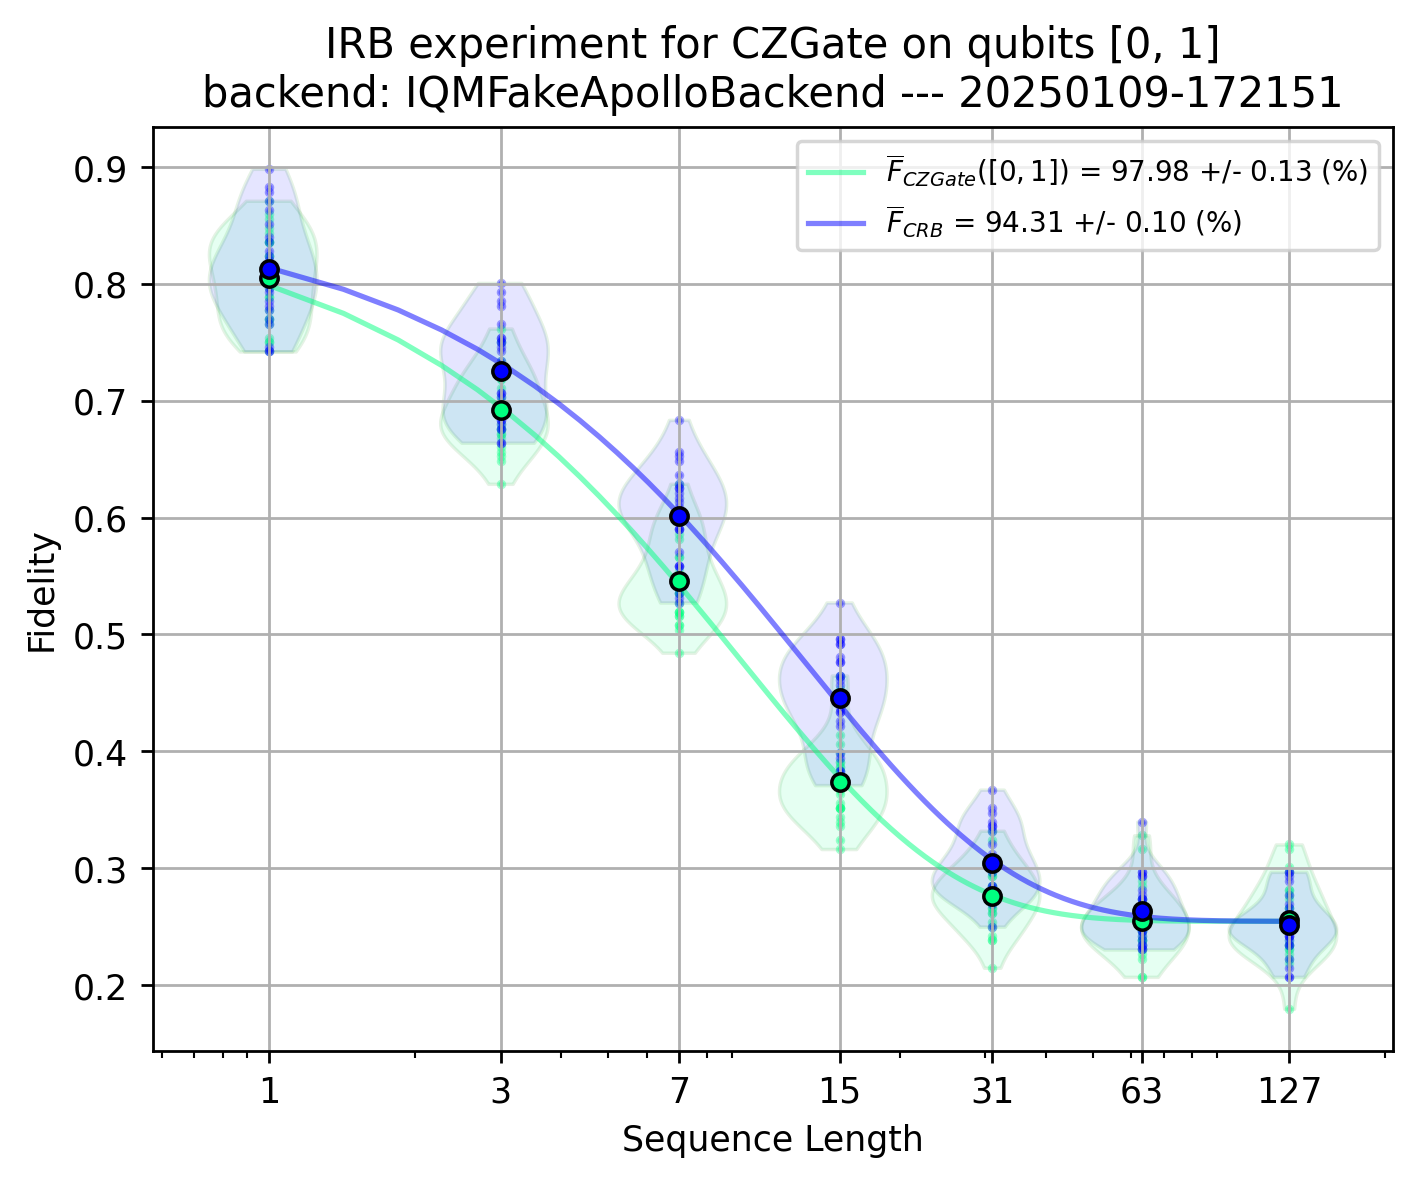

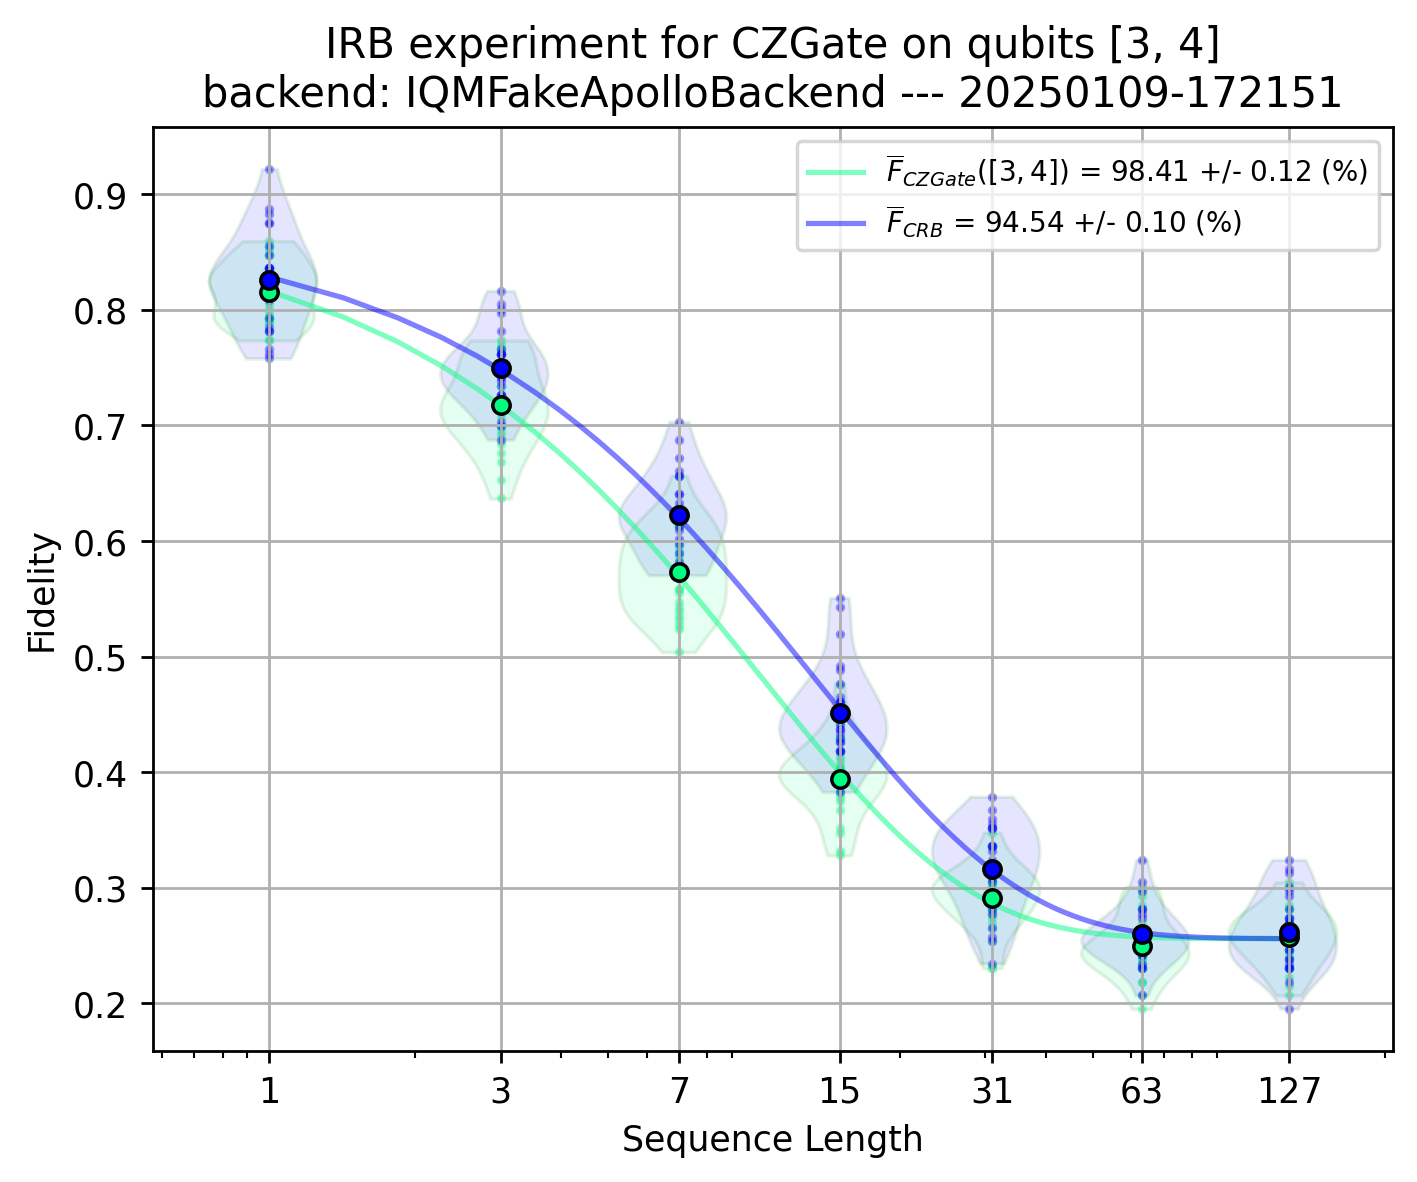

In [13]:
for plot in result_irb_2Q.plots.values():
    display(plot)

## IRB for non-native gate


In [14]:
EXAMPLE_IRB_iswap = InterleavedRBConfiguration(
    qubits_array=[[3,4],[8,9]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=30,
    shots=2**10,
    calset_id=None, # calibration set ID, default is None
    parallel_execution=True, # whether RB is run in parallel - use if you know what you're doing!
    interleaved_gate = "iSwapGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

In [15]:
benchmark_irb_iswap = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_iswap)
run_irb_iswap = benchmark_irb_iswap.run()

2025-01-09 17:24:09,166 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-01-09 17:24:09,174 - iqm.benchmarks.logging_config - INFO - Now executing parallel Interleaved RB on qubits [[3, 4], [8, 9]]. Will generate and submit all 30 Interleaved and Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127].
2025-01-09 17:24:09,174 - iqm.benchmarks.logging_config - INFO - Generating Clifford RB circuits of sequence length 1
2025-01-09 17:24:09,346 - iqm.benchmarks.logging_config - INFO - Generating Interleaved RB circuits of sequence length 1
2025-01-09 17:24:09,593 - iqm.benchmarks.logging_config - INFO - Submitting batch with 30 circuits corresponding to qubits [3, 4, 8, 9]
2025-01-09 17:24:09,593 - iqm.benchmarks.logging_config - INFO - Submitting batch with 30 circuits corresponding to qubits [3, 4, 8, 9]
2025-01-09 17:24:09,650 - iqm.benchmarks.logging_config - INFO - Both jobs for sequence length 1 submitted successfully!
2025-01-09 17:

In [16]:
result_irb_iswap = benchmark_irb_iswap.analyze()

2025-01-09 17:27:05,496 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Interleaved RB for qubits [[3, 4], [8, 9]]
2025-01-09 17:27:05,566 - iqm.benchmarks.logging_config - INFO - Metrics for Clifford estimated successfully!
2025-01-09 17:27:05,636 - iqm.benchmarks.logging_config - INFO - Metrics for Interleaved estimated successfully!


{'interleaved': {'[3, 4]': 0.9344679810705316}, 'clifford': {'[3, 4]': 0.9463377694591251}}
[3, 4]
clifford
{'interleaved': {'[8, 9]': 0.9267928870925659}, 'clifford': {'[8, 9]': 0.943379008472002}}
[8, 9]
clifford


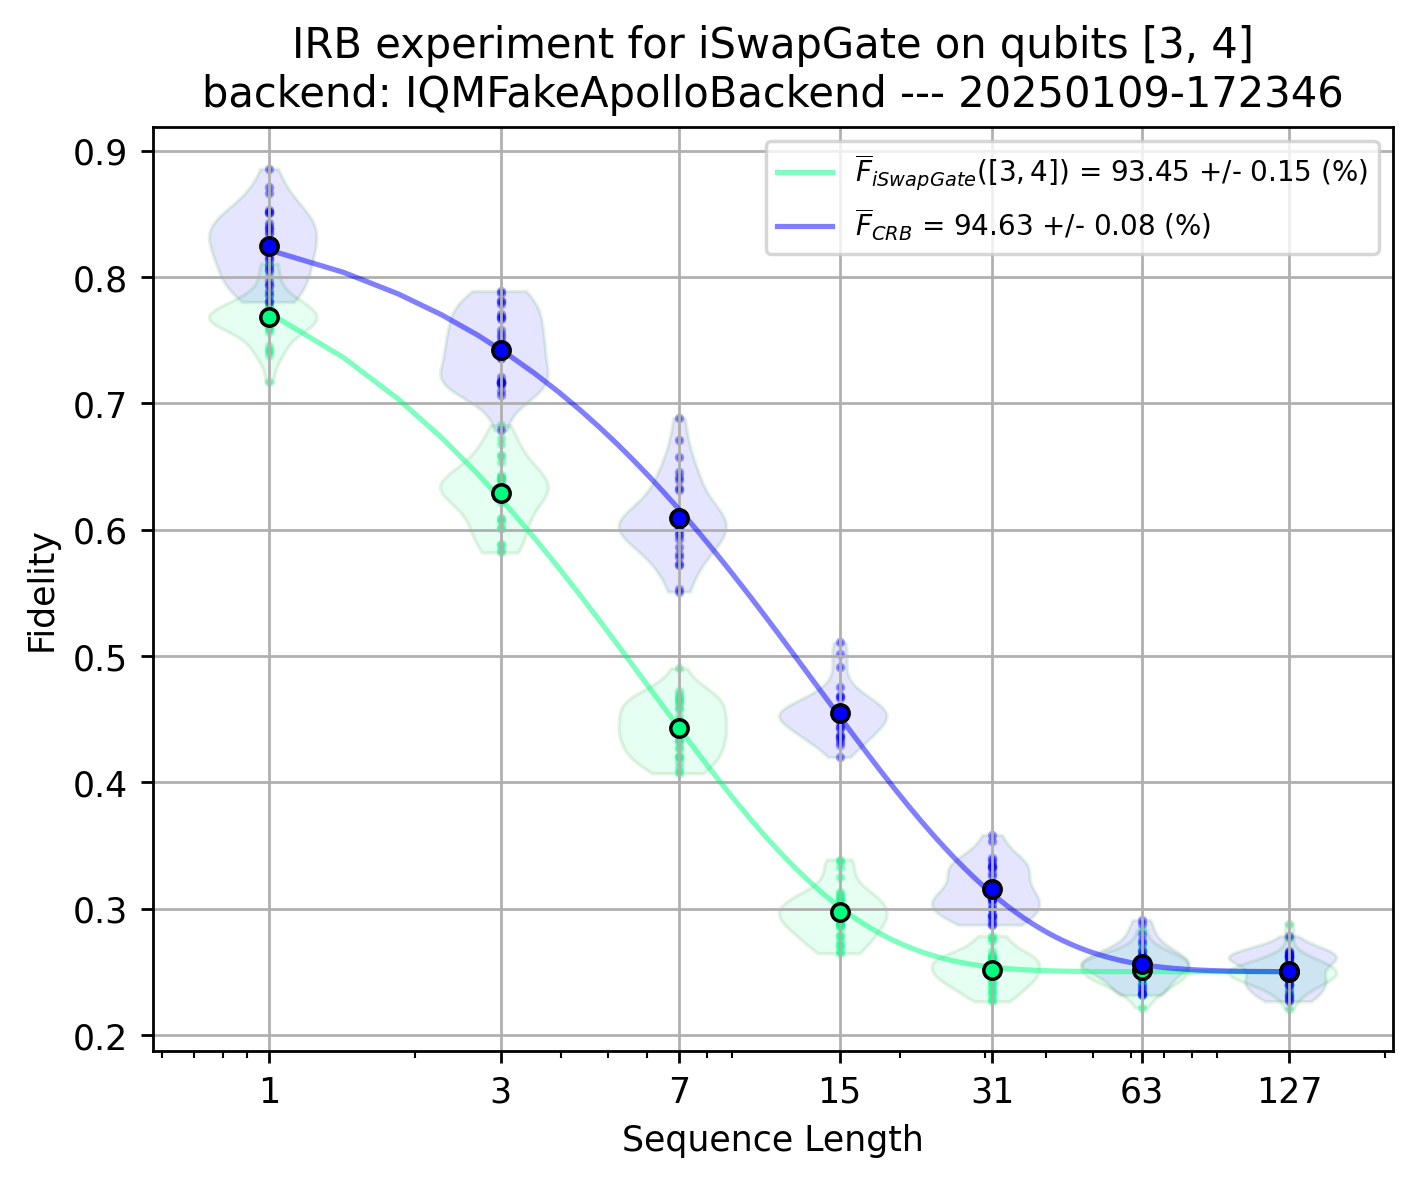

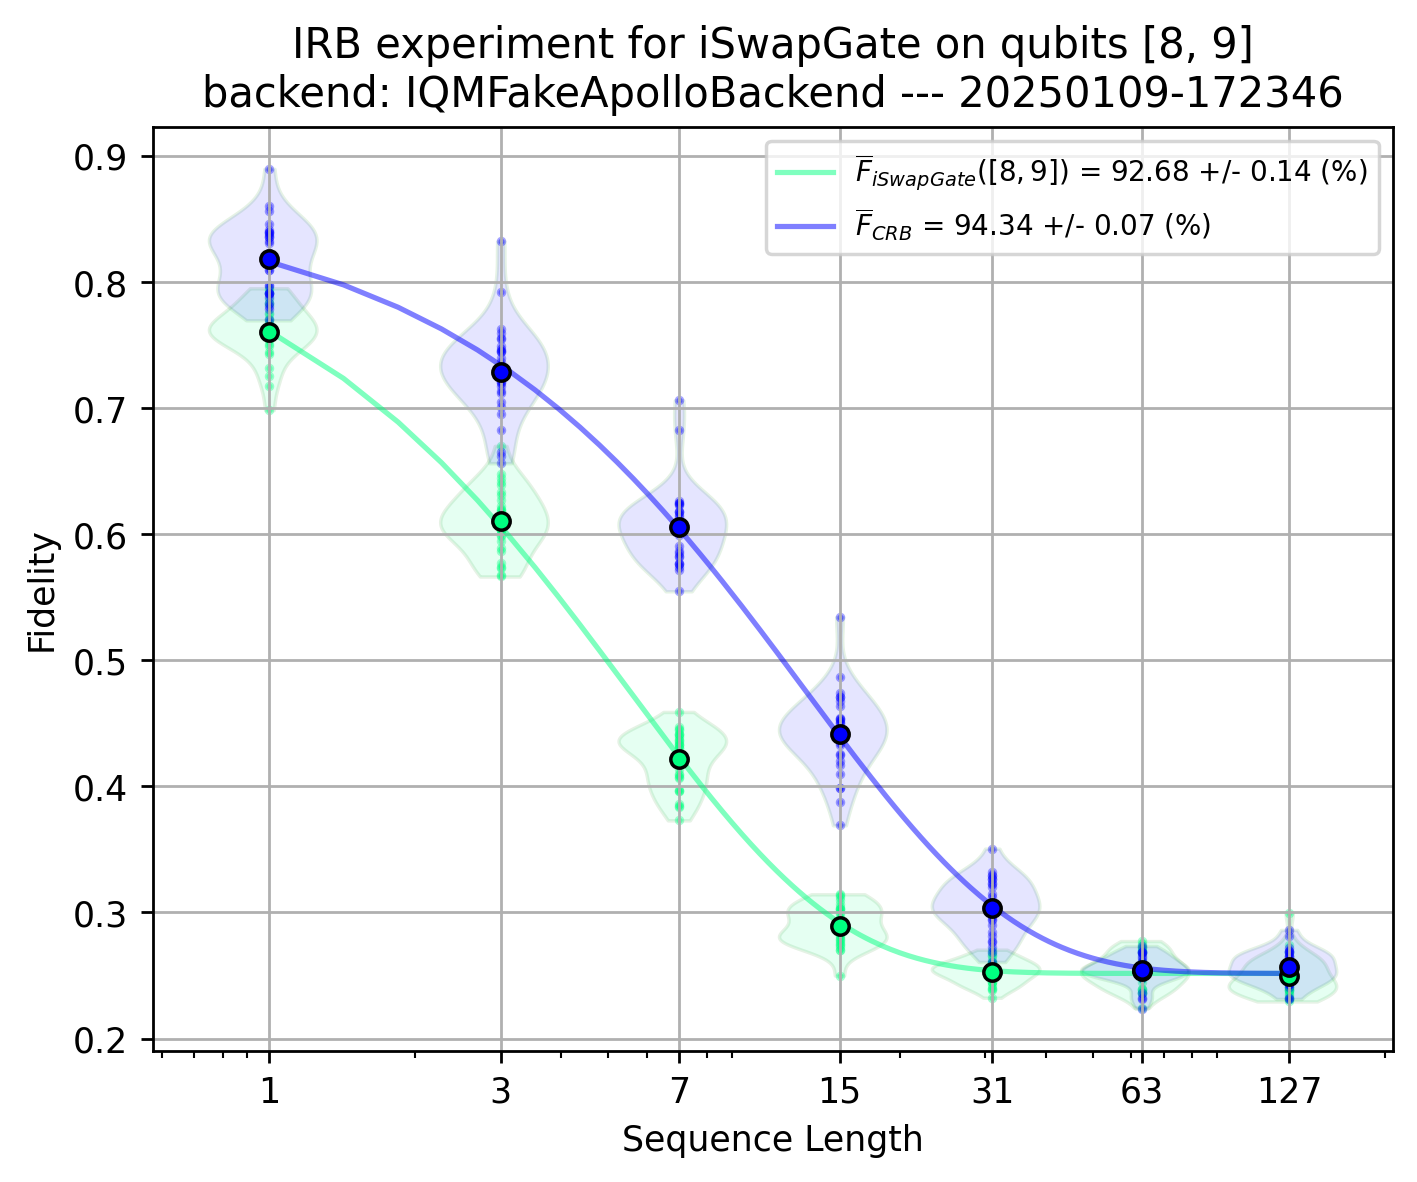

In [17]:
for plot in result_irb_iswap.plots.values():
    display(plot)